In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

df = pd.concat([X, y], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/tmp/ipython-input-3-4132103493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


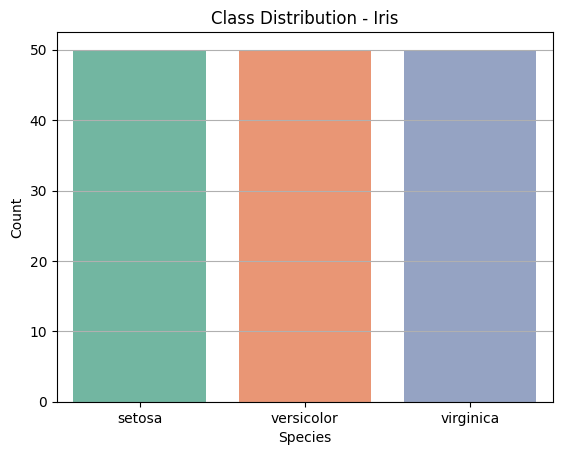

In [3]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Class Distribution - Iris")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.grid(axis='y')
plt.show()


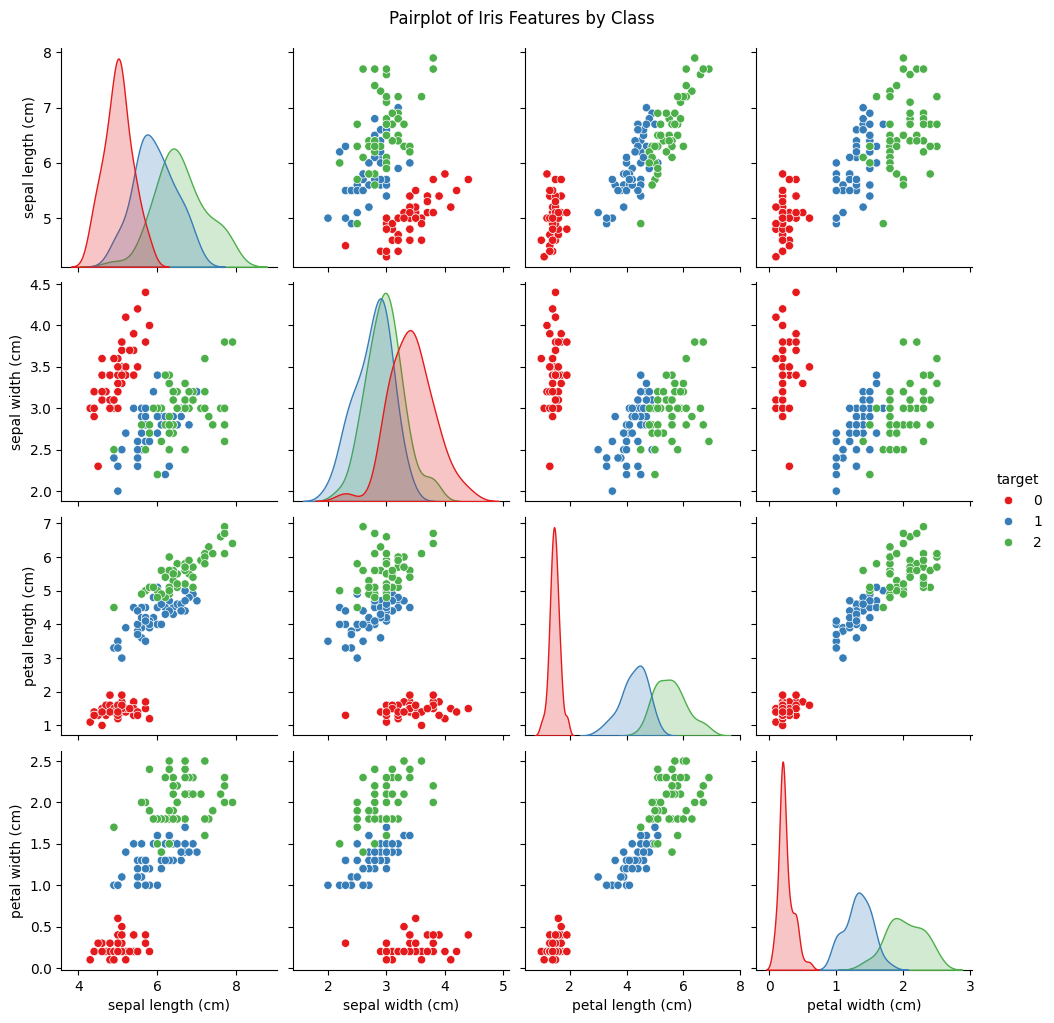

In [4]:
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Pairplot of Iris Features by Class", y=1.02)
plt.show()


In [5]:
model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("CV Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))


CV Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 95.33%


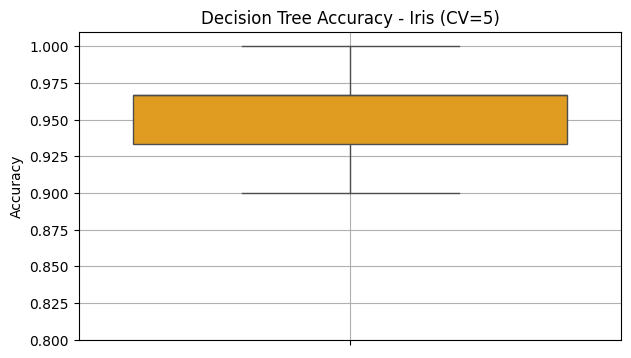

In [6]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=scores, color='orange')
plt.title("Decision Tree Accuracy - Iris (CV=5)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.01)
plt.grid(True)
plt.show()
